Лабораторная работа № 4_1

БВТ2201 Шамсутдинов Рустам

In [273]:
import math
import random
import matplotlib.pyplot as plt


In [274]:
def random_frequency(n, p):
    m = 0

    for _ in range(n+1):
        u = random.uniform(0,1)
        
        
        if u < p:
            m+=1
    random_frequency = m / n

    return random_frequency


def sum_frequencies(n1, n2, n3, p):
    rf1 = random_frequency(n1,p)
    rf2 = random_frequency(n2,p)
    rf3 = random_frequency(n3,p)

    sum_random_freq = rf1 + rf2 + rf3 
    
    return sum_random_freq

In [275]:
def mathematical_expectation(values, N):
    return sum(values) / N

def disspersion(values, N):
    
    M = mathematical_expectation(values, N)
    sum_sq = sum([x**2 for x in values])

    D = (sum_sq / N - M ** 2) * N / (N - 1)

    return D

def std(values, N):
    D = disspersion(values, N)

    return math.sqrt(D)

In [276]:
def GetFreqData(values, A, B, IntervalsCount):

    dY = (B - A) / IntervalsCount
    Freq = [0] * IntervalsCount

    for j in range(len(values)):
        
        Yc = values[j]
        FN = math.floor(Yc / dY)
        Freq[FN] += 1

    for i in range(IntervalsCount):
        Freq[i] = Freq[i] / (len(values) * dY)

    return Freq


In [277]:
def theoretical_distribution_density(x, M, SME):

    power = -0.5 * ((x - M) / SME) ** 2

    f = math.exp(power) / (SME * math.sqrt(2 * math.pi)) 

    return f

In [278]:

def draw_histogram_and_pdf(left_boundary, right_boundary, IntervalsCount, relative_frequencies, STD, M):

    bins = [left_boundary + (i * (right_boundary - left_boundary) / IntervalsCount) for i in range(IntervalsCount + 1)]
    bar_width = (right_boundary - left_boundary) / IntervalsCount
    x_positions = [bins[i] for i in range(IntervalsCount)]

    plt.figure(figsize=(12, 6))


    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)], label="Гистограмма")
    
    x_values = [left_boundary + i * (right_boundary - left_boundary) / 1000 for i in range(1000)]
    y_values = [theoretical_distribution_density(x=x, M=M, SME=STD) for x in x_values]
  
    plt.plot(x_values, y_values, color='blue', label="ФПВ")

    plt.title("Гистограмма и ФПВ")
    plt.xlabel("Случайное число")
    plt.ylabel("Относительная частота / Плотность ")
    plt.legend()

    plt.show()

Вариант для N = 10



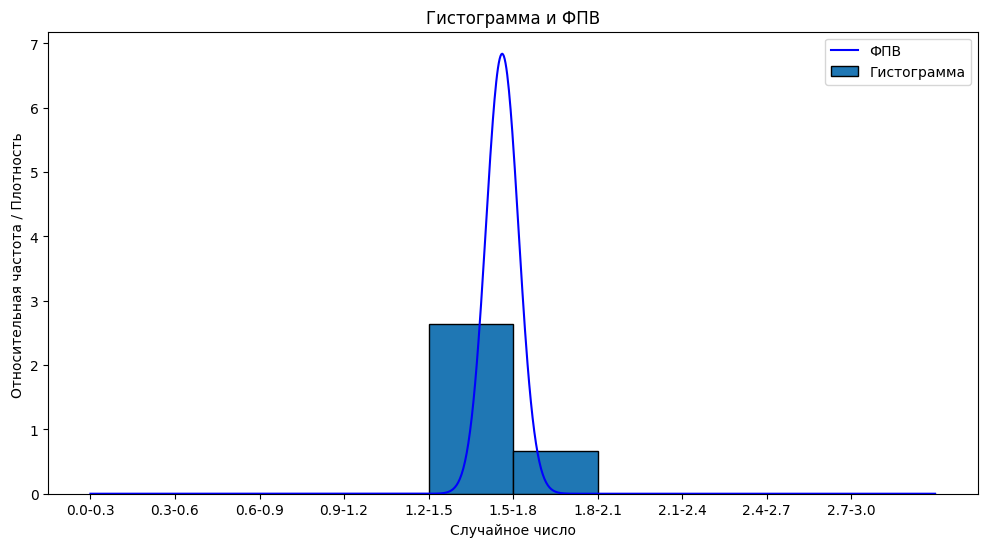

Вариант для N = 20



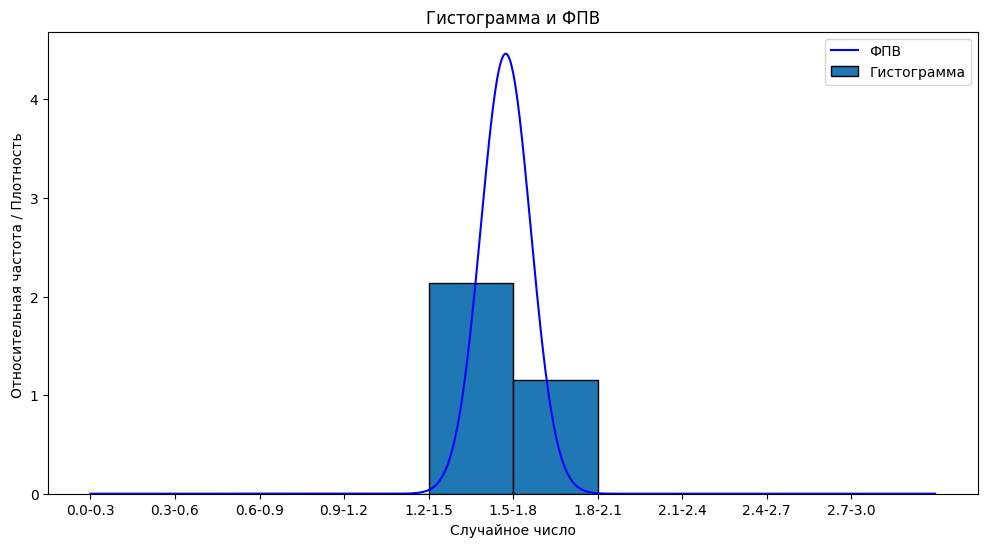

Вариант для N = 50



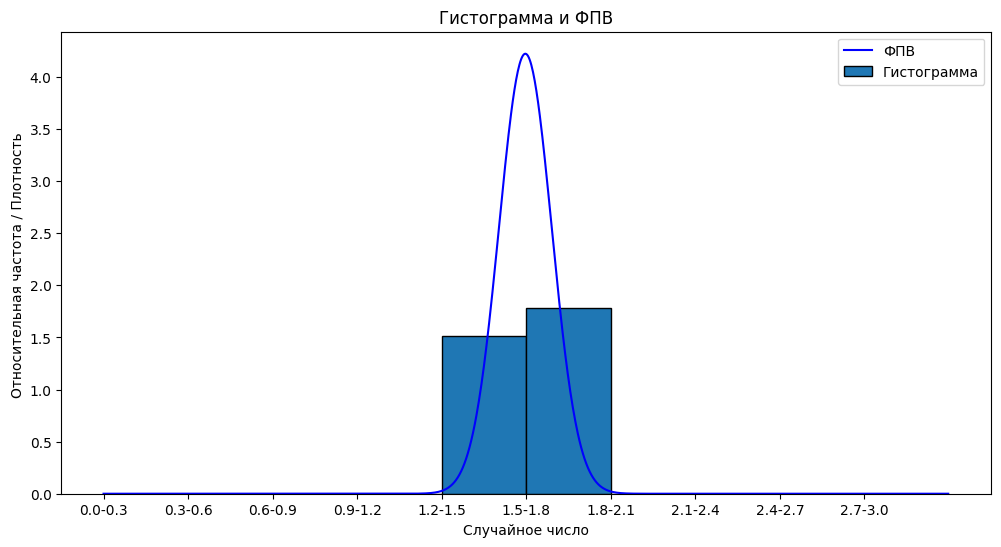

Вариант для N = 100



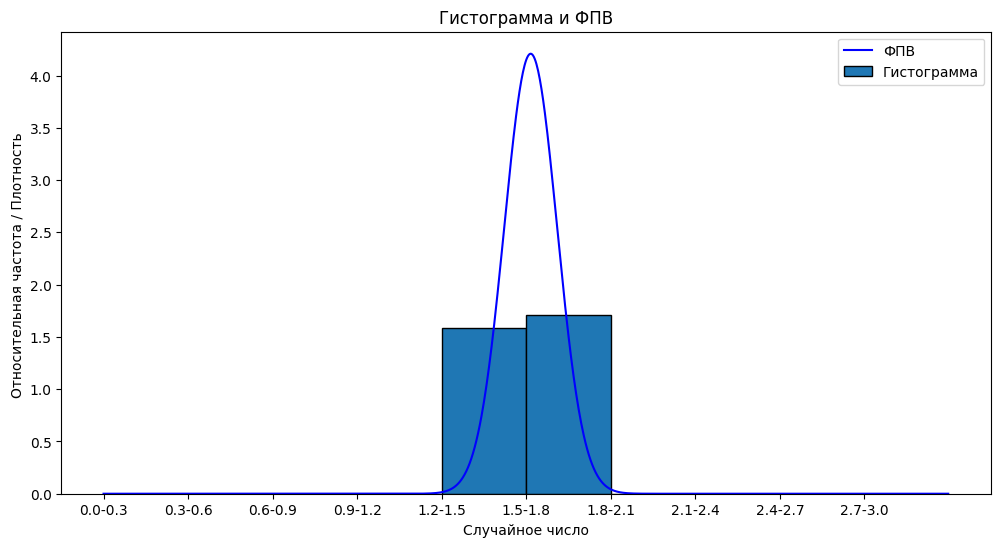

Вариант для N = 200



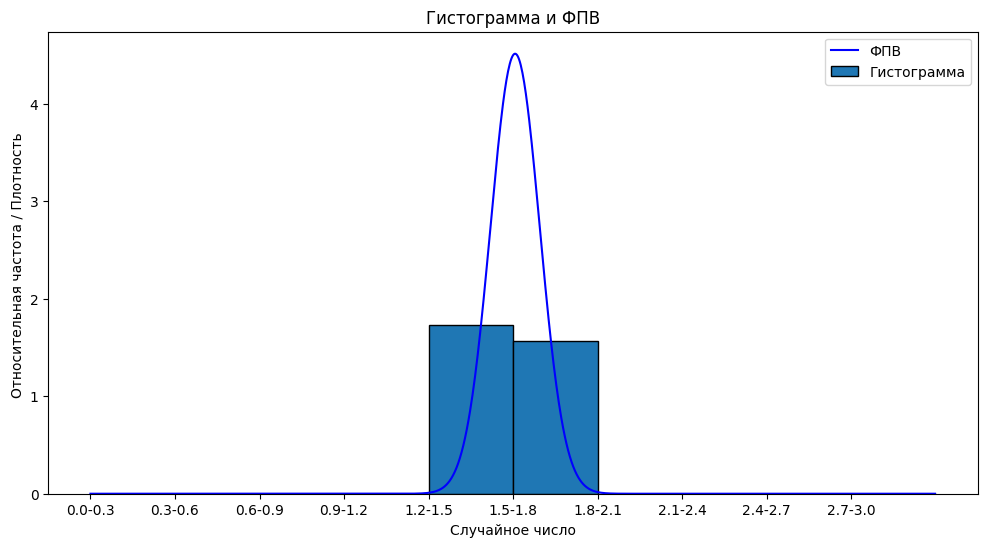

Вариант для N = 500



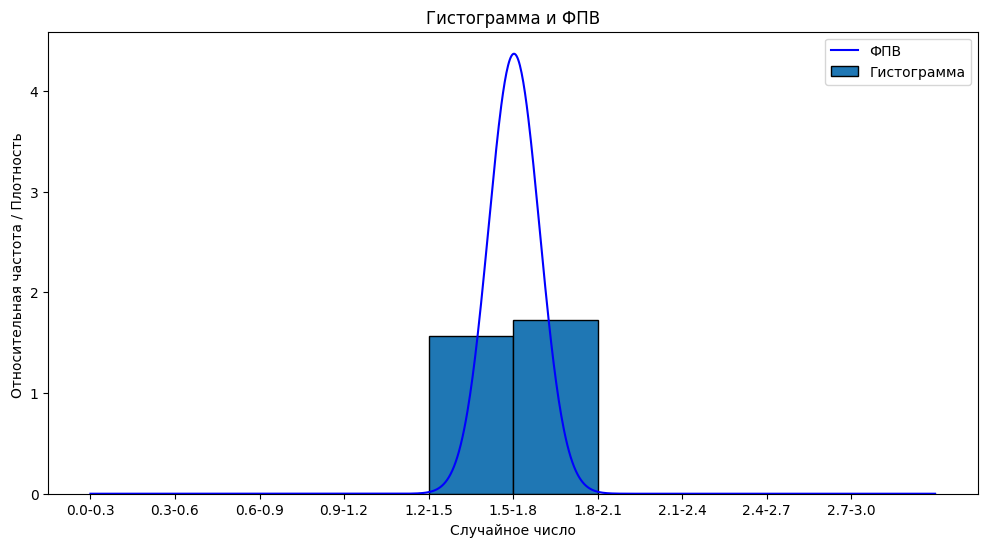

Вариант для N = 1000



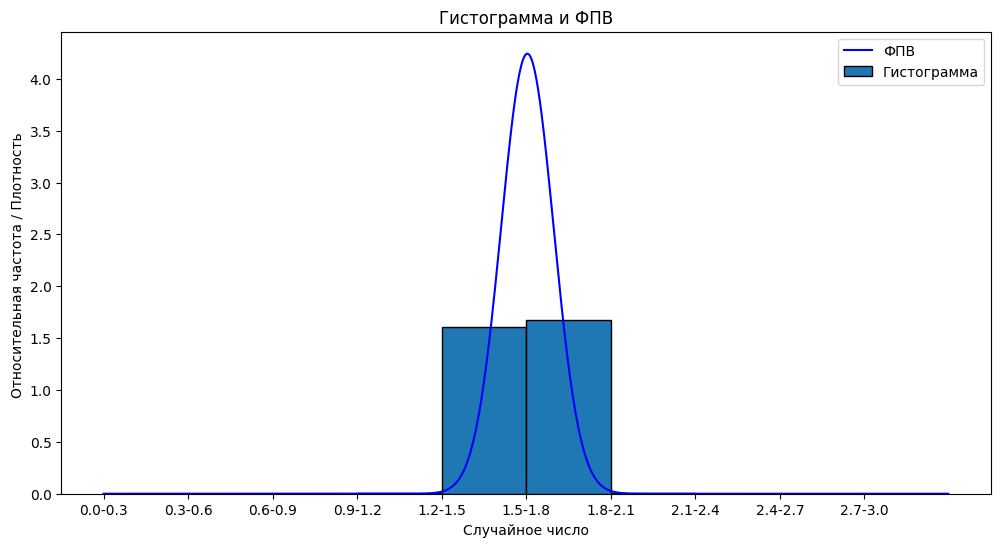

In [279]:
n1 = 50
n2 = 100
n3 = 200
p = 0.5

rf1 = 1
rf2 = 1
rf3 = 1

N_values= [10, 20, 50, 100, 200, 500, 10**3]

for N in N_values:
    random_frequencies = []

    for _ in range(N):
        # Generate random numbers 
        random_freq = sum_frequencies(n1, n2, n3, p)
        random_frequencies.append(random_freq)

    M = mathematical_expectation(random_frequencies, N)
    D = disspersion(random_frequencies, N)
    STD = std(random_frequencies, N)


    left_boundary = 0
    right_boundary = 3.035
    IntervalsCount = 10
    
    print(f"Вариант для N = {N}\n")

    freq = GetFreqData(random_frequencies, left_boundary, right_boundary, IntervalsCount)

    draw_histogram_and_pdf(left_boundary, right_boundary, IntervalsCount, freq, STD, M)


    